In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('boston.csv')
print(data.head())

      CRIM    ZN  INDUS  CHAS     NX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [14]:
X = data.drop('MEDV', axis=1).values
y = data['MEDV'].values
X_rooms = X[:,5]

print(type(X_rooms))
print(X_rooms.shape)


<class 'numpy.ndarray'>
(506,)


In [13]:
print(type(y))
print(y.shape)

<class 'numpy.ndarray'>
(506, 1)


In [15]:
y = y.reshape(-1,1)
X_rooms = X_rooms.reshape(-1,1)
print(y.shape)
print(X_rooms.shape)

(506, 1)
(506, 1)


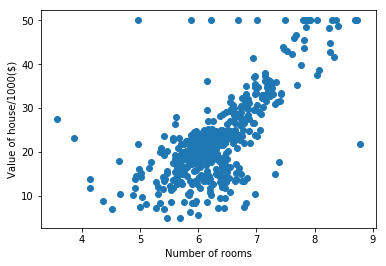

In [16]:
plt.scatter(X_rooms,y)
plt.ylabel('Value of house/1000($)')
plt.xlabel('Number of rooms')
plt.show();

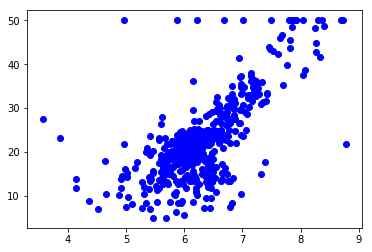

In [35]:
import numpy as np
from sklearn import linear_model
y = y.reshape(-1,1)
X_rooms = X_rooms.reshape(-1,1)
reg = linear_model.LinearRegression()
reg.fit(X_rooms,y)
prediction_space = np.linspace(min(X_rooms),max(X_rooms))

plt.scatter(X_rooms,y,color = 'blue')
# plt.plot(prediction_space,reg.predict(prediction_space), color ='black',linewidth = 3)
plt.show()

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
reg_all = linear_model.LinearRegression()
reg_all.fit(X_train,y_train)
y_pred = reg_all.predict(X_test)
print(X_train.shape)
print(y_train.shape)
reg_all.score(X_test,y_test)


(354, 13)
(354, 1)


0.7112260057484953

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
reg = linear_model.LinearRegression()
cv_results= cross_val_score(reg,X,y,cv=5)
print(cv_results)

[ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]


### Ridge Regression 

In [51]:
from sklearn.linear_model import Ridge
X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size = 0.3,random_state = 42)
ridge = Ridge(alpha = 0.1,normalize =  True)
ridge.fit(X_train,y_train)
ridge_pred = ridge.predict(X_test)
ridge.score(X_test,y_test)

0.6996938275127315

### Lasso Regression 

In [52]:
from sklearn.linear_model import Lasso
X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size = 0.3,random_state = 42)
lasso = Lasso(alpha = 0.1,normalize =  True)
lasso.fit(X_train,y_train)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test,y_test)

0.595022953532855

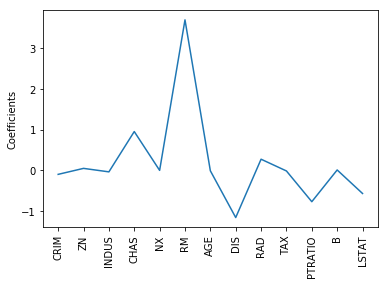

In [64]:
from sklearn.linear_model import Lasso
names  = data.drop("MEDV",axis = 1).columns
lasso=Lasso(alpha =0.1)
lasso_coef = lasso.fit(X,y).coef_
_= plt.plot(range(len(names)),lasso_coef)
_ = plt.xticks(range(len(names)),names,rotation =90)
_=plt.ylabel('Coefficients')
plt.show()

## Building the confusion matrix report

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

knn = KNeighboursClassifier(n_neighbours=8)

X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size = 0.4,random_state = 42)

knn.fit(X_trai,y_train)

y_pred = knn.predict(X_test)

print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

In [69]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# knn = KNeighboursClassifier(n_neighbours=8)
# X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size = 0.4,random_state = 42)
# knn.fit(X_trai,y_train)
# y_pred = knn.predict(X_test)
print(confusion_matrix(y_test,y_pred))

ValueError: continuous is not supported